In [1]:
# Zomato Order Data - Exploratory Data Analysis (EDA)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# optional for pretty plots
sns.set(style="whitegrid")

In [10]:
df = pd.read_csv("C:/Users/Sahil/ZomatoData/Zomato.csv", encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: xlabel='City'>

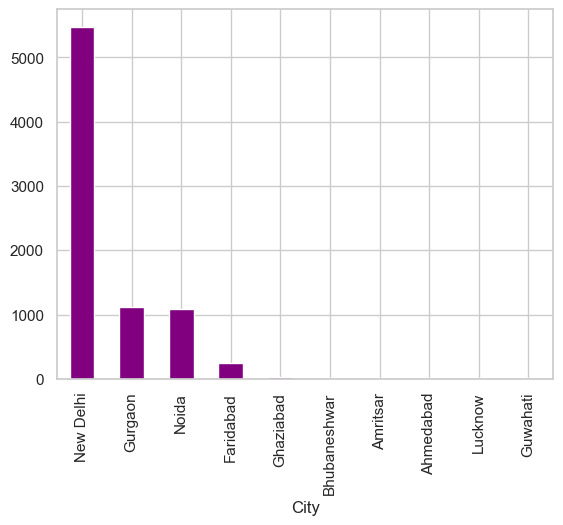

In [14]:
df['City'].value_counts().head(10).plot(kind='bar', color='purple')

In [19]:
# Drop NA first
df = df.dropna(subset=['Cuisines'])

# Split the cuisines by comma and explode into rows
df_exploded = df.assign(Cuisine=df['Cuisines'].str.split(',')).explode('Cuisine')

# Remove whitespace
df_exploded['Cuisine'] = df_exploded['Cuisine'].str.strip()


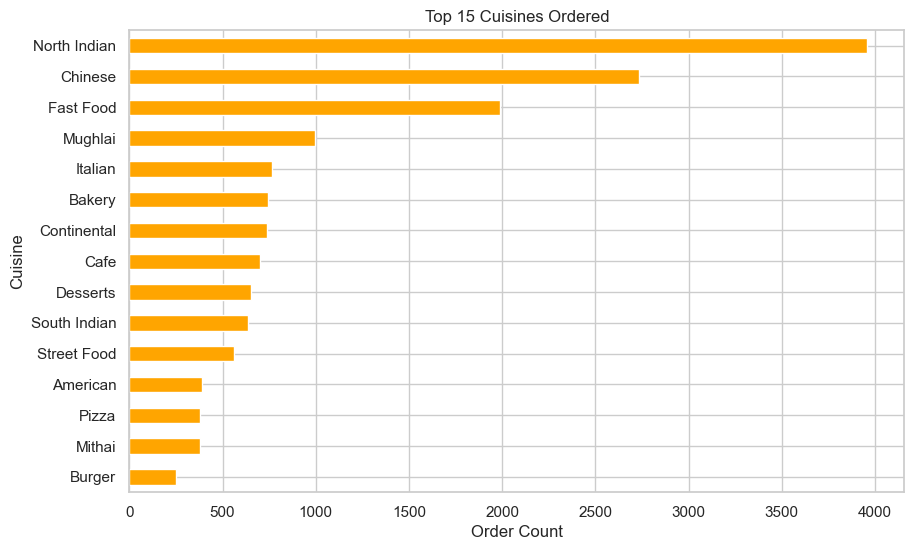

In [20]:
top_cuisines = df_exploded['Cuisine'].value_counts().head(15)

top_cuisines.plot(kind='barh', color='orange', figsize=(10, 6))
plt.xlabel("Order Count")
plt.ylabel("Cuisine")
plt.title("Top 15 Cuisines Ordered")
plt.gca().invert_yaxis()  # most popular at top
plt.show()

Text(0.5, 1.0, 'Top Cities Supporting Online Delivery')

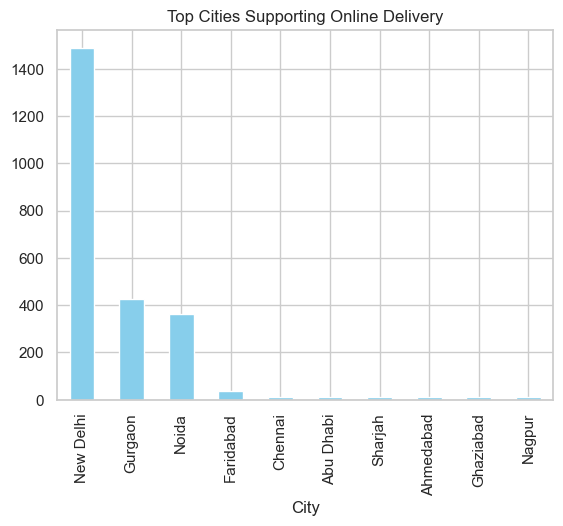

In [26]:
online_df = df[df['Has Online delivery'] == "Yes"]
online_df['City'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Cities Supporting Online Delivery")

Text(0.5, 1.0, 'Top 10 Cities with Most Restaurants')

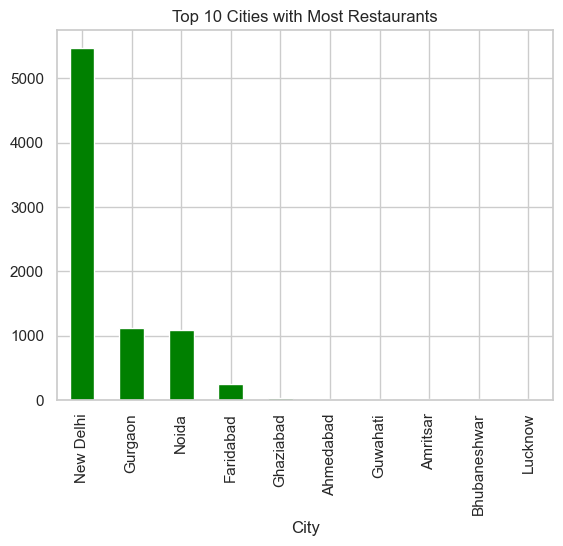

In [25]:
df['City'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Cities with Most Restaurants")

Text(0.5, 1.0, 'Table Booking Availability')

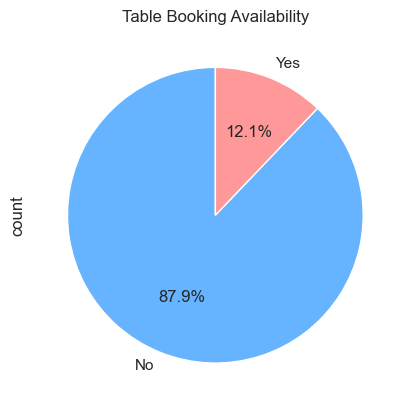

In [27]:
df['Has Table booking'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Table Booking Availability")

Text(0.5, 1.0, 'Price Range vs Aggregate Rating')

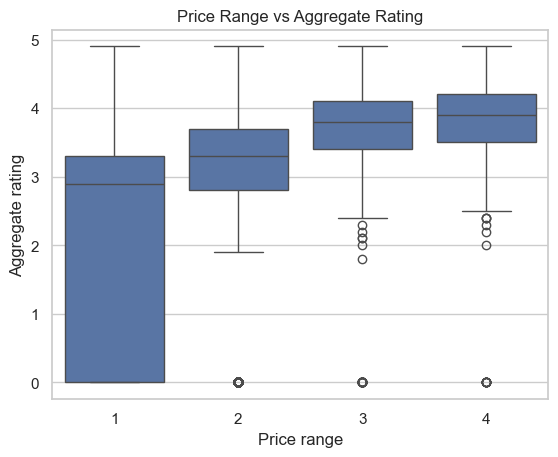

In [28]:
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title("Price Range vs Aggregate Rating")

Text(0.5, 1.0, 'Votes vs Rating')

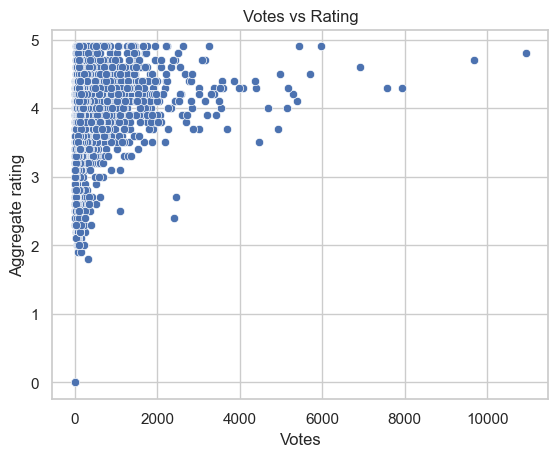

In [29]:
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title("Votes vs Rating")

In [30]:
df.groupby(['Country Code', 'Currency']).size().reset_index().drop_duplicates()

,Country Code,Currency,0
0,1,Indian Rupees(Rs.),8652
1,14,Dollar($),24
2,30,Brazilian Real(R$),60
3,37,Dollar($),4
4,94,Indonesian Rupiah(IDR),21
5,148,NewZealand($),40
6,162,Botswana Pula(P),22
7,166,Qatari Rial(QR),20
8,184,Dollar($),20
9,189,Rand(R),60


In [31]:
top_rated = df[df['Aggregate rating'] >= 4.5][['Restaurant Name', 'City', 'Aggregate rating']]
top_rated.head(10)

,Restaurant Name,City,Aggregate rating
0,Le Petit Souffle,Makati City,4.8
1,Izakaya Kikufuji,Makati City,4.5
3,Ooma,Mandaluyong City,4.9
4,Sambo Kojin,Mandaluyong City,4.8
8,Spiral - Sofitel Philippine Plaza Manila,Pasay City,4.9
9,Locavore,Pasig City,4.8
10,Silantro Fil-Mex,Pasig City,4.9
12,Silantro Fil-Mex,Quezon City,4.8
17,Balay Dako,Tagaytay City,4.5
18,Hobing Korean Dessert Cafe,Taguig City,4.5
